In [1]:
import numpy as np
import skfuzzy as fuzz 
from skfuzzy import control as ctrl 

In [24]:
suhu_udara = ctrl.Antecedent(np.arange(0, 38, 1), 'Suhu Udara')
kelembapan = ctrl.Antecedent(np.arange(0, 71, 1), 'Kelembapan Tanah')
durasi     = ctrl.Consequent(np.arange(0, 91, 1), 'Durasi Penyiraman')

# membership function

In [25]:
suhu_udara['cool'] = fuzz.trimf(suhu_udara.universe, [0, 7.5, 15])
suhu_udara['normal'] = fuzz.trimf(suhu_udara.universe, [11, 18.5, 26])
suhu_udara['hot'] = fuzz.trimf(suhu_udara.universe, [22, 29.5, 37])

In [26]:
kelembapan['dry'] = fuzz.trimf(kelembapan.universe, [0, 10, 20])
kelembapan['moist'] = fuzz.trimf(kelembapan.universe, [15, 32.5, 50])
kelembapan['wet'] = fuzz.trimf(kelembapan.universe, [40, 55, 70])

In [27]:
durasi['short'] = fuzz.trimf(durasi.universe, [0, 14, 28])
durasi['medium'] = fuzz.trimf(durasi.universe, [20, 34, 48])
durasi['long'] = fuzz.trimf(durasi.universe, [40, 65, 90])

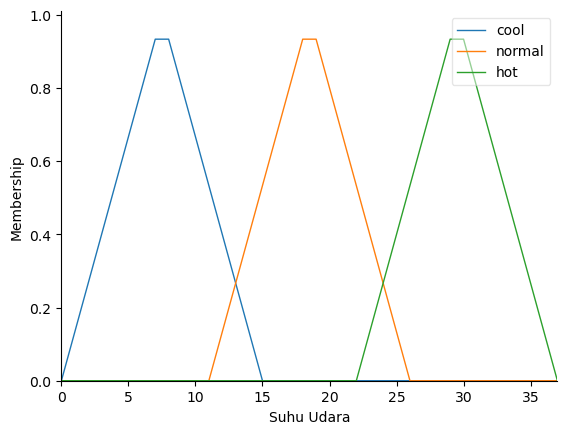

In [28]:
suhu_udara.view()

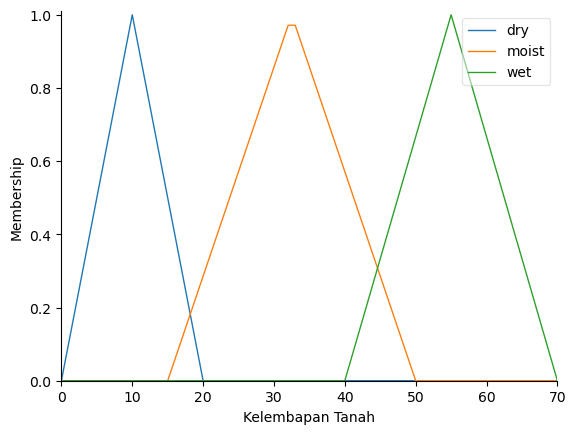

In [29]:
kelembapan.view()

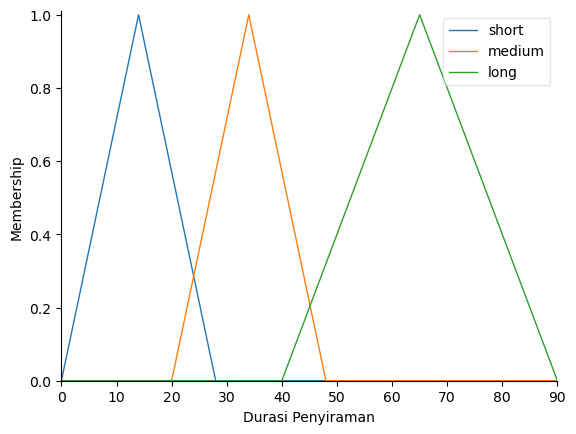

In [30]:
durasi.view()

# define rule

In [31]:
rule1 = ctrl.Rule(suhu_udara['hot'] & kelembapan['dry'], durasi['long'])
rule2 = ctrl.Rule(suhu_udara['hot'] & kelembapan['moist'], durasi['medium'])
rule3 = ctrl.Rule(suhu_udara['normal'] & kelembapan['dry'], durasi['long'])
rule4 = ctrl.Rule(suhu_udara['normal'] & kelembapan['moist'], durasi['medium'])

In [32]:
penyiraman_ctrl = ctrl.ControlSystem([rule1, rule2, rule3, rule4])

In [33]:
durasi_penyiraman = ctrl.ControlSystemSimulation(penyiraman_ctrl)

In [36]:
durasi_penyiraman.input['Suhu Udara'] = 35
durasi_penyiraman.input['Kelembapan Tanah'] = 17
durasi_penyiraman.compute()

59.2571154811333


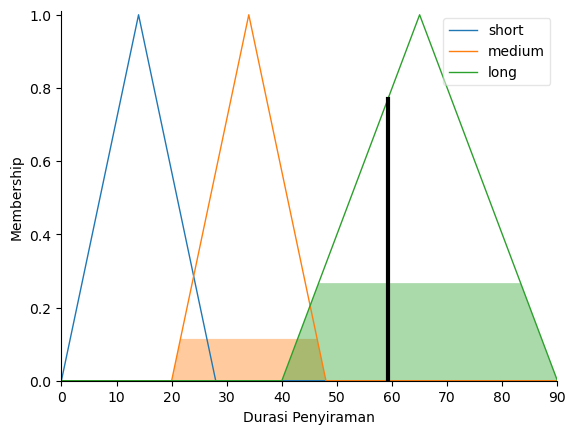

In [37]:
print(durasi_penyiraman.output['Durasi Penyiraman'])
durasi.view(sim=durasi_penyiraman)